<a href="https://colab.research.google.com/github/Satish055/Shanumukh/blob/main/SONAR_Rock_vs_Mine_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SONAR Rock vs Mine Prediction**



Import necessary libraries in python code

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

**DATA COLLECTION AND DATA PREPROCESSING**

In [7]:
df=pd.read_csv('/content/Copy of sonar data.csv',header=None)
# Print the fisrt 5 rows of data from data set using head()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [6]:
# Printing last rows of data from data set using tail()
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [8]:
# Number of rows and columns using :shape
df.shape

(208, 61)

In [13]:
# Statistical Measures for data set
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Finding the Missing values in dataset

In [12]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [14]:
# INFORMATION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [16]:
df[60].value_counts()

,count
60,
M,111
R,97


<Axes: xlabel='count', ylabel='60'>

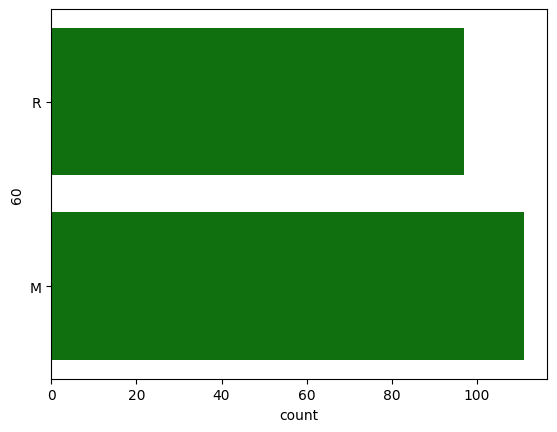

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df[60],label='count', color='green')


In [28]:
# Spliting the data into features and targerts
X=df.drop(columns=60,axis=1)
y=df[60]

In [29]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [30]:
y

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


**Training and test data**

In [43]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)


In [32]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (166, 60) (42, 60)


In [33]:
print(y.shape,y_train.shape,y_test.shape)

(208,) (166,) (42,)


**MODEL EVALUTION**

In [34]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred=model.predict(X_train)

In [36]:
print(y_pred)

['R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R'
 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M'
 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M'
 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R'
 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R'
 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R'
 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'R'
 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M'
 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R'
 'M' 'M' 'R' 'R']


In [44]:
# Accuarcy for Train data
train_acc=accuracy_score(y_pred,y_train)
print(f'Accuarcy for training data is {train_acc}')

Accuarcy for training data is 0.8072289156626506


In [45]:
# Accuracy for test Data
y_pred_test=model.predict(X_test)
test_acc=accuracy_score(y_pred_test,y_test)
print(f'Accuarcy for test data is {test_acc}')

Accuarcy for test data is 0.8095238095238095


In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[20  2]
 [ 6 14]]


In [50]:
cm=confusion_matrix(y_train,y_pred)
print(cm)

[[77 12]
 [20 57]]


**Making a predictive system**

In [47]:
input_data=(0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044)

# Changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')



['R']
The object is a Rock


In [48]:
#2.Testing on another row in dataset
inp_2=(0.0264,0.0071,0.0342,0.0793,0.1043,0.0783,0.1417,0.1176,0.0453,0.0945,0.1132,
       0.0840,0.0717,0.1968,0.2633,0.4191,0.5050,0.6711,0.7922,0.8381,0.8759,0.9422,
       1.0000,0.9931,0.9575,0.8647,0.7215,0.5801,0.4964,0.4886,0.4079,0.2443,0.1768,
       0.2472,0.3518,0.3762,0.2909,0.2311,0.3168,0.3554,0.3741,0.4443,0.3261,0.1963,
       0.0864,0.1688,0.1991,0.1217,0.0628,0.0323,0.0253,0.0214,0.0262,0.0177,0.0037,
       0.0068,0.0121,0.0077,0.0078,0.0066)
# Changing the input data into numpy array
input_num_2=np.asarray(inp_2)

# Reshape the numpy array as we are predicting for one instance
inp_res_1=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(inp_res_1)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock
